# Python and R
Notebook Setup

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
import pythonimports
import psycopg2
import pandas as pd

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Load FEC Data

Data is loaded from this FEC link:

https://www.fec.gov/data/browse-data/?tab=bulk-data

In [3]:
conn = psycopg2.connect(
    host="postgresfec.cnvthm1pgcw1.us-east-2.rds.amazonaws.com",
    database="fec",
    user="postgresfec",
    password="postgresfec")

cursor = conn.cursor()
print("Database connected successfully")

Database connected successfully


In [4]:
print("List of tables in the database; see documentation below:")
print("https://www.fec.gov/data/browse-data/?tab=bulk-data")


List of tables in the database; see documentation below:
https://www.fec.gov/data/browse-data/?tab=bulk-data


In [5]:
cursor.execute(
    """SELECT table_name FROM information_schema.tables
       WHERE table_schema = 'public'""")

for table in cursor.fetchall():
    print(table)


('candidate_committee_linkages',)
('individual_contributions',)
('candidate_master',)
('operating_expenditures',)
('committee_candidate_contributions',)
('pac_summary',)
('committee_master',)
('temp_individual_contributions',)
('committee_transactions',)
('house_senate_current_campaigns',)


In [7]:
# Query the database
sql = '''SELECT * FROM house_senate_current_campaigns;'''
house_senate_current_campaigns = pd.read_sql(sql, con=conn)
house_senate_current_campaigns

,cand_id,cand_name,cand_ici,pty_cd,cand_pty_affiliation,ttl_receipts,trans_from_auth,ttl_disb,trans_to_auth,coh_bop,...,prim_election,run_election,gen_election,gen_election_precent,other_pol_cmte_contrib,pol_pty_contrib,cvg_end_dt,indiv_refunds,cmte_refunds,file_year
0,H0AL01055,"CARL, JERRY LEE, JR",I,2,REP,1238769.95,281319.87,931386.18,0.0,111972.59,...,None,None,None,None,486500.00,0.00,11/28/2022,21700.00,0.0,2022
1,H0AL02202,"HARVEY-HALL, PHYLLIS",C,1,DEM,60238.24,0.00,60204.67,0.0,0.00,...,None,None,None,None,350.00,3331.18,11/28/2022,0.00,0.0,2022
2,H0AL05163,"BROOKS, MO",I,2,REP,3615102.95,0.00,4750635.47,0.0,1137501.18,...,None,None,None,None,93500.00,0.00,12/31/2022,329546.00,5500.0,2022
3,H0AL07086,"SEWELL, TERRI A.",I,1,DEM,2340477.83,0.00,1606404.50,0.0,2243480.25,...,None,None,None,None,1664247.82,0.00,11/28/2022,7387.00,1500.0,2022
4,H0AR01083,"CRAWFORD, ERIC ALAN RICK",I,2,REP,1076160.34,0.00,637982.03,0.0,182708.24,...,None,None,None,None,587900.00,3600.00,11/28/2022,0.00,0.0,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2847,S8NC00270,"WILLIAMS, MARCUS W.",O,1,DEM,3786.77,0.00,3786.77,0.0,0.00,...,None,None,None,None,0.00,0.00,05/19/2022,0.00,0.0,2022
2848,S8NY00082,"SCHUMER, CHARLES E.",I,1,DEM,37789568.91,47400.82,38047831.46,0.0,10275597.49,...,None,None,None,None,2959915.35,0.00,11/28/2022,616809.88,6700.0,2022
2849,S8OH00086,"GIBBONS, MICHAEL",O,2,REP,19308077.25,0.00,19281487.04,0.0,122.15,...,None,None,None,None,5200.00,0.00,09/30/2022,248405.00,200.0,2022
2850,S8OH00144,"FARIS, STEPHEN I MR",O,3,W,6639.96,0.00,6517.69,0.0,0.00,...,None,None,None,None,0.00,0.00,11/28/2022,0.00,0.0,2022


# ggplot example

In [8]:
%%R

require(tidyverse)
require(ggbeeswarm)
require(ggrepel)

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.1.4      ✔ stringr 1.4.0 
✔ readr   2.1.3      ✔ forcats 0.5.1 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


R[write to console]: Loading required package: ggbeeswarm

R[write to console]: Loading required package: ggrepel



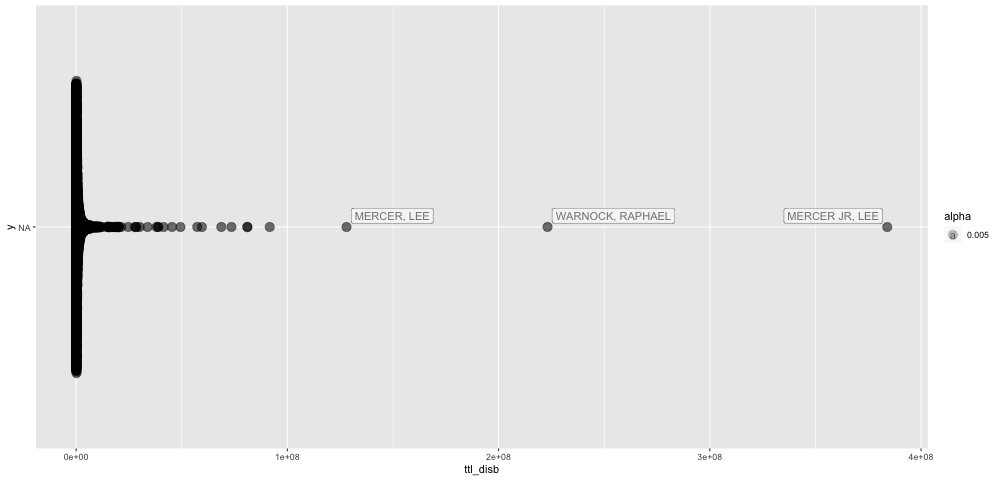

In [9]:
%%R -i house_senate_current_campaigns -w 1000

df <- house_senate_current_campaigns

ggplot(df) +
    aes(x=ttl_disb, y=NA, alpha=.005, label=cand_name) +
    geom_quasirandom(size=4) +
    geom_label_repel(data=df %>% filter(ttl_disb > 1e+07)) 

In [10]:
house_senate_current_campaigns.sort_values(by='ttl_disb', ascending=False)

,cand_id,cand_name,cand_ici,pty_cd,cand_pty_affiliation,ttl_receipts,trans_from_auth,ttl_disb,trans_to_auth,coh_bop,...,prim_election,run_election,gen_election,gen_election_precent,other_pol_cmte_contrib,pol_pty_contrib,cvg_end_dt,indiv_refunds,cmte_refunds,file_year
2454,P40004541,"MERCER JR, LEE",None,1,DEM,3.840000e+08,0.00,3.840000e+08,0.00,-32.32,...,None,None,None,None,0.00,0.00,06/30/2021,0.00,0.0,2022
2508,S0GA00559,"WARNOCK, RAPHAEL",I,1,DEM,2.064288e+08,11404000.41,2.231586e+08,2481.77,22762985.43,...,None,None,None,None,2114489.56,55760.84,12/26/2022,2501358.03,27975.0,2022
2465,P40007296,"MERCER, LEE",None,1,DEM,1.280000e+08,0.00,1.280000e+08,0.00,202.52,...,None,None,None,None,0.00,0.00,12/31/2022,0.00,0.0,2022
2502,S0AZ00350,"KELLY, MARK",I,1,DEM,9.235173e+07,3073032.85,9.165264e+07,0.00,1402523.46,...,None,None,None,None,1477485.09,51200.00,11/28/2022,1847552.70,13800.0,2022
628,H2FL08063,"DEMINGS, VALDEZ 'VAL'",I,1,DEM,8.092734e+07,1369769.21,8.106547e+07,0.00,771421.87,...,None,None,None,None,961238.58,0.00,11/28/2022,1408898.69,9300.0,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,H2TX12093,"RECTOR, CHRISTOPHER D.",C,3,NNE,0.000000e+00,0.00,0.000000e+00,0.00,0.00,...,None,None,None,None,0.00,0.00,06/30/2021,0.00,0.0,2022
1722,H2TX06202,"MARKLAND, MONTGOMERY L",O,2,REP,0.000000e+00,0.00,0.000000e+00,0.00,0.00,...,None,None,None,None,0.00,0.00,02/19/2021,0.00,0.0,2022
1710,H2TX03266,"TUCKER, TERRY",O,1,DEM,0.000000e+00,0.00,0.000000e+00,0.00,0.00,...,None,None,None,None,0.00,0.00,03/15/2021,0.00,0.0,2022
1669,H2TN03201,"DOSS, NATHANIEL MR. III",C,1,DEM,0.000000e+00,0.00,0.000000e+00,0.00,0.00,...,None,None,None,None,0.00,0.00,06/30/2021,0.00,0.0,2022


# close database connections

In [11]:
# Close the connection
cursor.close()
conn.close()